In [1]:
import torch
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
torch.__version__

'1.6.0'

In [3]:
tf.__version__

'2.2.0'

In [4]:
a,b=5,7
c=a+b

In [5]:
print(c)

12


In [6]:
A=torch.rand(5,3)
A

tensor([[0.9817, 0.1698, 0.7373],
        [0.7699, 0.5294, 0.7800],
        [0.4128, 0.6771, 0.0039],
        [0.9342, 0.7563, 0.8946],
        [0.9206, 0.1347, 0.8261]])

In [7]:
B=torch.zeros(5,3)
D=torch.eye(5,3)

B,D.shape

(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 torch.Size([5, 3]))

In [8]:
E=torch.randn(3)
E

tensor([ 2.2672,  1.3278, -0.5185])

In [9]:
E.device, E.shape

(device(type='cpu'), torch.Size([3]))

In [10]:
print(A+5*D)

tensor([[5.9817, 0.1698, 0.7373],
        [0.7699, 5.5294, 0.7800],
        [0.4128, 0.6771, 5.0039],
        [0.9342, 0.7563, 0.8946],
        [0.9206, 0.1347, 0.8261]])


In [11]:
x = torch.randn(4)
x[2]

tensor(-0.0424)

## Une simple fonction à minimiser

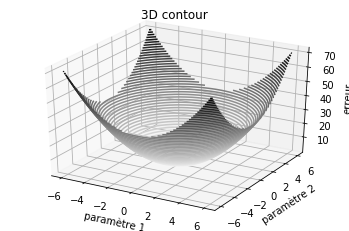

In [4]:
def fonction(x,y):
    return (x**2 + y**2)

x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)


X,Y=np.meshgrid(x,y)
Z=fonction(X,Y)

fig=plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('paramètre 1')
ax.set_ylabel('paramètre 2')
ax.set_zlabel('erreur')
ax.set_title('3D contour')
plt.show()

## creation de deux variables 

Pour le calcul du gradient ** $x=x-\alpha \nabla F(x,y)$ **

In [13]:
x=torch.tensor(3,dtype=torch.float,requires_grad=True)
y=torch.tensor(3,dtype=torch.float,requires_grad=True) # requires_grad=True pour dire qu'on veeux le gradient



 on définit la boucle d'entrainment pour minimiser le gradient de **$F(x,y)=x^2 +y^2$**

In [14]:
for i in range(100):
    resul=x**2 +y**2 # on definit notre resultat
    print("resultat=>>",resul) # le gradient n'est pas encore calculé
    # calcul du gradient pour chacune des opérations effectuées
    resul.backward()# s'applique sur le tensor pour calculer le gradient, il va remonter sur toutes les opérations effectuées pour obtenir ce resultat
    # on fait la descente de gradient
    #print(x.grad)
    #print(y.grad)
    with torch.no_grad(): # ici on ne traque pas le gradient, on modifie simplement x et y
        x-=0.1*x.grad
        y-=0.1*y.grad

    #tres important de remettre les gradients à 0
    x.grad.zero_()
    y.grad.zero_()

    

resultat=>> tensor(18., grad_fn=<AddBackward0>)
resultat=>> tensor(11.5200, grad_fn=<AddBackward0>)
resultat=>> tensor(7.3728, grad_fn=<AddBackward0>)
resultat=>> tensor(4.7186, grad_fn=<AddBackward0>)
resultat=>> tensor(3.0199, grad_fn=<AddBackward0>)
resultat=>> tensor(1.9327, grad_fn=<AddBackward0>)
resultat=>> tensor(1.2370, grad_fn=<AddBackward0>)
resultat=>> tensor(0.7916, grad_fn=<AddBackward0>)
resultat=>> tensor(0.5067, grad_fn=<AddBackward0>)
resultat=>> tensor(0.3243, grad_fn=<AddBackward0>)
resultat=>> tensor(0.2075, grad_fn=<AddBackward0>)
resultat=>> tensor(0.1328, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0850, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0544, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0348, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0223, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0143, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0091, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0058, grad_fn=<AddBackward0>)
resultat=>> tensor(0.0037, grad_f

In [15]:
print(x,y)

tensor(6.1111e-10, requires_grad=True) tensor(6.1111e-10, requires_grad=True)


## Tenseur CUDA

Les opérations de Pytorch peuvent etre utilisées sur le GPU ou sur le CPU. Il existe quelques opérations de bases pour interagire comme:

In [6]:
print(torch.cuda.is_available())

False


In [7]:
a=torch.rand(3,2)
a.shape

torch.Size([3, 2])

In [8]:
a=a.unsqueeze(0)
a.shape,a

(torch.Size([1, 3, 2]),
 tensor([[[0.4963, 0.7682],
          [0.0885, 0.1320],
          [0.3074, 0.6341]]]))

In [5]:

from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST # Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0) # Set for testing purposes, please do not change!

In [9]:
a

tensor([[[0.4963, 0.7682],
         [0.0885, 0.1320],
         [0.3074, 0.6341]]])

In [10]:
torch.add(a,a)

tensor([[[0.9925, 1.5364],
         [0.1770, 0.2641],
         [0.6148, 1.2682]]])

In [11]:
x=torch.arange(6)
x

tensor([0, 1, 2, 3, 4, 5])

In [12]:
torch.add(x,x)

tensor([ 0,  2,  4,  6,  8, 10])

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Réseau de neurones avec Pytorch

On peut construire un réseau de neurones en utilisant le package **torch.nn**, comme on a un aperçu de **autograd**, **nn** depend de **autograd** pour definir les modèles et les différentielles. Une module **nn.Module** contient les couches et une methode **forward(input)** qui retourne une sortie

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# on defini la classe 
class Net(nn.Module):
    def __init__§